# Project Overview
Title: Logistic Regression Model: Credit Card Fraud

Author: Jayden Chan

Description: This notebook will seek to implement a logistic regression model on a dataset of credit card fraud. The dataset is comprised of several features including: distance from home, distance from last transaction, ratio to median purchase price, etc. The goal of this model will be to predict whether a credit card transaction is fraudulent or not.

Credits: The dataset used in this notebook has been sourced from [Kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud). Some code has been sourced from [Coursera](https://www.coursera.org/learn/machine-learning) and edited to fit project requirements.

# Outline
- [ 1 - Packages ](#packages)
- [ 2 - Data Preparation ](#data_preparation)
    - [ 2.1 - Data Loading ](#data_loading)
    - [ 2.2 - Data Analysis ](#data_analysis)
    - [ 2.3 - Feature Normalization ](#feature_normalization)
    - [ 2.4 - Data Visualization ](#data_visualization)
    - [ 2.5 - Feature Mapping ](#feature_mapping)
- [ 3 - Logistic Regression ](#linear_regression)
    - [ 3.1 - Cost Function ](#cost_function)
    - [ 3.2 - Gradient Function ](#gradient_function)
    - [ 3.3 - Gradient Descent ](#gradient_descent)
    - [ 3.4 - Batch Gradient Descent ](#batch_gradient_descent)
    - [ 3.5 - Prediction Accuracy ](#prediction_accuracy)

<a id='packages'></a>
## 1 - Packages
- [numpy](www.numpy.org)
- [matplotlib](http://matplotlib.org)
-  ``utility.py`` contains useful helper functions for the implementation of this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *
import copy
import math

%matplotlib inline

<a id='data_preparation'></a>
## 2 - Data Preparation

<a id='data_loading'></a>
### 2.1 - Data Loading

The `load_data()` function will load the data in the .csv file into 3 arrays.
- `categories` contains the names of the features in the dataset.
- `x_array` contains the features in a 2D numpy array.
- `y_array` contains the labels in a 1D numpy array.
    - `y_array` = 1 if the transaction was fraudulent
    - `y_array` = 0 if the transaction was legitimate

In [2]:
categories, x_array, y_array = load_data("card_transdata.csv")

<a id='data_analysis'></a>
### 2.2 - Data Analysis

In [3]:
# View categories
print("The categories are:\n", categories[:])

The categories are:
 ['distance_from_home' 'distance_from_last_transaction'
 'ratio_to_median_purchase_price' 'repeat_retailer' 'used_chip'
 'used_pin_number' 'online_order']


In [4]:
# View features
print("First five elements in x_array are:\n", x_array[:5])
print("Type of x_array", type(x_array))

First five elements in x_array are:
 [[57.87785658  0.31114001  1.94593998  1.          1.          0.
   0.        ]
 [10.8299427   0.1755915   1.29421881  1.          0.          0.
   0.        ]
 [ 5.09107949  0.80515259  0.42771456  1.          0.          0.
   1.        ]
 [ 2.24756433  5.60004355  0.36266258  1.          1.          0.
   1.        ]
 [44.190936    0.56648627  2.2227673   1.          1.          0.
   1.        ]]
Type of x_array <class 'numpy.ndarray'>


In [5]:
# View labels
print("First five elements in y_array are:\n", y_array[:5])
print("Type of y_array", type(y_array))

First five elements in y_array are:
 [0. 0. 0. 0. 0.]
Type of y_array <class 'numpy.ndarray'>


In [6]:
# View sizes
print ('The shape of x_array is: ' + str(x_array.shape))
print ('The shape of y_array is: ' + str(y_array.shape))
print ('We have m = %d training examples' % (len(y_array)))

The shape of x_array is: (1000000, 7)
The shape of y_array is: (1000000,)
We have m = 1000000 training examples


<a id='feature_normalization'></a>
### 2.3 - Feature Normalization

Because some of the features have large differences in scale, we will be performing feature scaling to improve data usability.

In [7]:
x_array = feature_scaling(x_array)

In [8]:
# View scaled features
print("First five elements in x_array are:\n", x_array[:5])
print("Type of x_array", type(x_array))

First five elements in x_array are:
 [[5.44291477e-03 2.62441132e-05 7.25000486e-03 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.01809034e-03 1.48064867e-05 4.81638009e-03 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.78354145e-04 6.79290539e-05 1.58072302e-03 1.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [2.10923470e-04 4.72523493e-04 1.33780914e-03 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00]
 [4.15566916e-03 4.77903126e-05 8.28371967e-03 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00]]
Type of x_array <class 'numpy.ndarray'>


<a id='data_visualization'></a>
### 2.4 - Data Visualization

Change the `category1` and `category2` inputs to determine what is graphed on the x-axis and y-axis.

Change the `x_limiter` and `y_limiter` inputs to determine how the x-axis and y-axis are scaled.

Change the `marker_size` input to determine the size of markers on the graph.

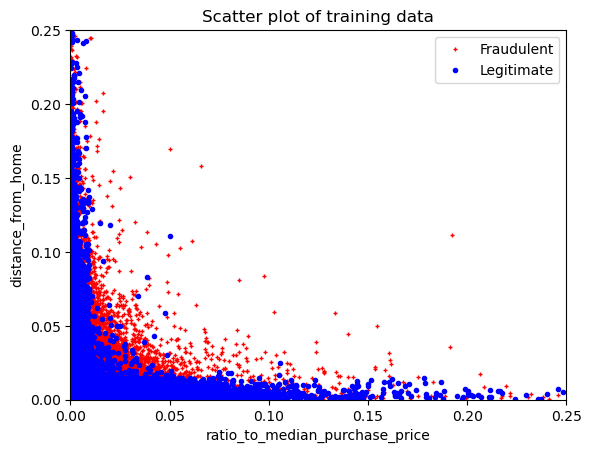

In [9]:
# ===== User Settings =====
category1 = 0
category2 = 2

x_limiter = 0.25
y_limiter = 0.25

marker_size = 3

# ===== Graph Code =====
logistic_graph(x_array, y_array, category1, category2, marker_size, pos_label="Fraudulent", neg_label="Legitimate")

plt.ylabel(categories[category1])
plt.xlabel(categories[category2])
plt.title("Scatter plot of training data")
plt.legend(loc="upper right")

plt.xlim(0, x_limiter)
plt.ylim(0, y_limiter)

plt.show()

<a id='feature_mapping'></a>
### 2.5 - Feature Mapping

Because the datset is nonlinear, we will have to perform feature mapping.

In [10]:
print("Original shape of data:", x_array.shape)

# View mapped features
mapped_x = map_features(x_array)
print("Shape after feature mapping:", mapped_x.shape)

Original shape of data: (1000000, 7)
Shape after feature mapping: (1000000, 28)


In [11]:
# Compare features
print("x_array[0]:", x_array[0])
print("mapped x_array[0]:", mapped_x[0])

x_array[0]: [5.44291477e-03 2.62441132e-05 7.25000486e-03 1.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00]
mapped x_array[0]: [2.60009492e-14 3.26731805e-28 3.26731805e-28 1.45221121e-13
 5.25682344e-16 1.45221121e-13 1.00000000e+00 2.62441132e-05
 5.25625705e-05 1.00000000e+00 1.00000000e+00 2.62441132e-05
 5.25625705e-05 1.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


<a id='logistic_regression'></a>
## 3 - Logistic Regression

<a id='cost_function'></a>
### 3.1 - Cost Function

In [12]:
def compute_cost(x, y, w, b, optional=None):
    '''
    Computes the cost function over the entire dataset.
    
    Args:
        x (ndarray Shape (m,n)) : An array containing the features of the dataset.
        y (ndarray Shape (m,))  : An array containing the labels of the dataset. 
        w (ndarray Shape (n,))  : An array containing the parameters of the model.
        b (scalar)              : The bias term.
    Returns:
        cost (scalar) : The total cost.
    '''
    
    m = x.shape[0]
    z_wb = np.dot(x, w) + b
    
    f_wb = sigmoid(z_wb)
    
    epsilon = 1e-10
    f_wb = np.clip(f_wb, epsilon, 1 - epsilon)
    
    loss = -np.dot(y.T, np.log(f_wb)) - np.dot((1 - y).T, np.log(1 - f_wb))
    
    cost = (1/m)*loss
    
    return cost

In [13]:
def compute_cost_reg(x, y, w, b, lambda_const):
    '''
    Computes the cost function over the entire dataset while accounting for regularization.
    
    Args:
        x (ndarray Shape (m,n))      : An array containing the features of the dataset.
        y (ndarray Shape (m,))       : An array containing the labels of the dataset. 
        w (ndarray Shape (n,))       : An array containing the parameters of the model.
        b (scalar)                   : The bias term.
        lambda_const (scalar, float) : Regularization constant
    Returns:
        cost (scalar) : The total cost.
    '''
    
    m, n = x.shape
    
    orig_cost = compute_cost(x, y, w, b, 0)
    reg_cost = 0
    
    for i in range(n):
        reg_cost += w[i]**2
    
    reg_cost *= (lambda_const / (2 * m))
    
    cost = orig_cost + reg_cost
    
    return cost

<a id='gradient_function'></a>
### 3.2 - Gradient Function

In [14]:
def compute_gradient(x, y, w, b, optional=None):
    '''
    Compute the gradients of the loss function with respect to the parameters w and b.
    
    Args:
        x (ndarray Shape (m,n)) : An array containing the features of the dataset.
        y (ndarray Shape (m,))  : An array containing the labels of the dataset. 
        w (ndarray Shape (n,))  : An array containing the parameters of the model.
        b (scalar)              : The bias term.
    Returns:
        d_dw (ndarray Shape (n,)) : An array containing the gradients of the loss function with respect to the parameters w.
        d_db (scalar)             : The gradient of the loss function with respect to the bias term.
    '''

    m =x.shape[0]
    z_wb = np.dot(x, w) + b
    
    f_wb = sigmoid(z_wb)
        
    dj_dw = np.dot(x.T, f_wb - y) / m
    dj_db = np.sum(f_wb - y) / m
        
    return dj_dw, dj_db

In [15]:
def compute_gradient_reg(x, y, w, b, lambda_const):
    '''
    Compute the gradients of the loss function with respect to the parameters w and b.
    
    Args:
        x (ndarray Shape (m,n))      : An array containing the features of the dataset.
        y (ndarray Shape (m,))       : An array containing the labels of the dataset. 
        w (ndarray Shape (n,))       : An array containing the parameters of the model.
        b (scalar)                   : The bias term.
        lambda_const (scalar, float) : Regularization constant
    Returns:
        d_dw (ndarray Shape (n,)) : An array containing the gradients of the loss function with respect to the parameters w.
        d_db (scalar)             : The gradient of the loss function with respect to the bias term.
    '''

    m, n  = x.shape
        
    dj_dw, dj_db = compute_gradient(x, y, w, b, 0)
        
    for i in range(n):
        dj_dw_reg = (lambda_const / m) * w[i]
        dj_dw[i] += dj_dw_reg
    
    return dj_dw, dj_db

<a id='gradient_descent'></a>
### 3.3 - Gradient Descent

In [16]:
def gradient_descent(x, y, w_i, b_i, cost_function, gradient_function, alpha, iterations, lambda_const, tolerance):
    '''
    Performs batch gradient descent by simultaneously updating w and b in order to reduce cost.
    
    Args:
        x (ndarray Shape (m,n))      : An array containing the features of the dataset.
        y (ndarray Shape (m,))       : An array containing the labels of the dataset. 
        w_i (ndarray Shape (n,))     : An array containing the initial parameters of the model.
        b_i (scalar)                 : The initial bias term.
        cost_function                : Function to compute cost
        gradient_function            : Function to compute gradient
        alpha (float)                : Learning Rate
        iterations (int)             : The number of times to run this function
        lambda_const (scalar, float) : Regularization constant
    Returns:
        w_f (ndarray Shape (n,)) : An array containing the updated parameters of the model.
        b_f (scalar)             : The updated bias term.
    '''
    
    cost_history = []
    prev_cost = float('inf')

    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w_i, b_i, lambda_const)
        
        # Simultaneous update of weights and bias
        w_i -= alpha * dj_dw
        b_i -= alpha * dj_db
        
        cost = cost_function(x, y, w_i, b_i, lambda_const)
        cost_history.append(cost)
        
        if abs(cost - prev_cost) < tolerance:
            print(f"Convergence reached at iteration {i}. Cost {float(cost_history[-1]):8.2f}")
            break

        prev_cost = cost
        
        if i % (iterations // 10) == 0 or i == (iterations-1):
            print(f"Iteration {i:4}: Cost {float(cost_history[-1]):8.2f}")
        
    return w_i, b_i

<a id='batch_gradient_descent'></a>
### 3.4 - Batch Gradient Descent

In [17]:
# ===== Initial Parameters =====
np.random.seed(1)
m, n = x_array.shape
w_i = 0.001 * (np.random.rand(mapped_x.shape[1]) - 0.5 )
b_i = 0

# ===== User Settings =====
iterations = 10000
alpha = 0.1
lambda_const = 0.01
tolerance = 1e-6

# =========================
w, b = gradient_descent(mapped_x, y_array, w_i, b_i, compute_cost_reg, compute_gradient_reg, 
                        alpha, iterations, lambda_const, tolerance)

Iteration    0: Cost     0.63
Iteration 1000: Cost     0.27
Iteration 2000: Cost     0.26
Convergence reached at iteration 2495. Cost     0.26


<a id='prediction_accuracy'></a>
### 3.5 - Prediction Accuracy

In [18]:
def predict(x, w, b): 
    """
    Predict whether the label is 0 or 1.
    
    Args:
        x (ndarray Shape (m,n)) : An array containing the features of the dataset.
        w (ndarray Shape (n,))  : An array containing the parameters of the model.
    Returns:
        p (ndarray (m,)) : The predictions for x using a threshold at 0.5
    """
    
    z_wb = np.dot(x, w) + b
    
    probabilities = sigmoid(z_wb)
    
    p = (probabilities >= 0.5).astype(int)
        
    return p

In [19]:
p = predict(mapped_x, w, b)

# Compare predictions to labels
print('Train Accuracy: %f'%(np.mean(p == y_array) * 100))

Train Accuracy: 91.259700
